# Graph construction

## Graph types:
### (DONE) user-user reply-to graph
- User is linked to user through posts user left as reply to posts of other users
- Link prediction: Predict the link between 2 users if they both replied to the same post
### (WON'T DO) user-user post-to-same-article graph
- User is linked to user if 2 users left a post for the same article
- Link prediction: Predict the link between 2 users if they both left a post for the same article
### (WON'T DO) user-user vote-for-post graph
- User is linked to user if user left a vote for a post of the other user
- Link prediction: Predict the link between 2 users 
### (WON'T DO) user-user vote-for-same-post graph
- User is linked to user if 2 users voted for the same post
- Link prediction: Predict the link between 2 users if they both voted for the same post
### (DONE) user-article post-to-article graph
- User is linked to article if user left a post for the article
- Link prediction: Predict the link between user and article if user left a post for the article
### (DONE) user-article vote-for-article graph (obtained through posts)
- User is linked to article if user left a vote for a post of the article
- Link prediction: Predict the link between user and article if user left a vote for a post of the article
### (DONE) user-article post-or-vote graph
- User is linked to the article if user left a post or a vote for the article
- Link prediction: Predict the link between user and article if user left a post or a vote for the article
### (DONE) user-user onemode projection from user-article post-or-vote to users
- User is linked to user if they both posted or voted on the same article
- Link prediction: Predict the link between 2 users if they both posted or voted on the same article
### (DONE) article-article onemode projection from user-article post-or-vote to articles
- Article is linked to article if 2 articles were posted or voted by the same user

In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import os
print(os.getcwd())

## Data imports

The data set is provided by Der Standard, one of the top Austrian newspapers.
In the online Standard people can post comments below articles and up/down vote comments.
The data set used in this handson and further in the project part of the course will consider a sample of those articles, comments, and votes. 

In [3]:
postings_1 = pd.read_csv("../data/Postings_01052019_15052019.csv", sep = ';')
postings_2 = pd.read_csv("../data/Postings_16052019_31052019.csv", sep = ';')
votes_1 = pd.read_csv("../data/Votes_01052019_15052019.csv", sep = ';')
votes_2 = pd.read_csv("../data/Votes_16052019_31052019.csv", sep = ';')

postings = pd.concat([postings_1, postings_2])
votes = pd.concat([votes_1, votes_2])

In [4]:
postings.shape

(739094, 14)

In [5]:
votes.shape

(3824984, 8)

# User-article post-to-article graph

In [6]:
post_article = postings.groupby(by = ['ID_CommunityIdentity', 'ID_Article']).agg({"ArticlePublishingDate": "min"})

In [7]:
post_article = post_article.reset_index()

In [8]:
edge_list = []
for row in post_article.itertuples():
    edge_list.append((row.ID_CommunityIdentity, row.ID_Article))


In [9]:
g_user_posting_article = nx.Graph()
g_user_posting_article.add_nodes_from(np.unique(post_article["ID_CommunityIdentity"]).tolist(), bipartite=0)
g_user_posting_article.add_nodes_from(np.unique(post_article["ID_Article"]).tolist(), bipartite=1)
g_user_posting_article.add_edges_from(edge_list)

In [10]:
len(np.unique(post_article["ID_CommunityIdentity"]).tolist())

23925

In [11]:
len(np.unique(post_article["ID_Article"]).tolist())


4351

# User-article voting graph
User is linked to article if user left a post for the article

In [12]:
votes[['ID_CommunityIdentity', 'ID_Posting']]

,ID_CommunityIdentity,ID_Posting
0,675862,1041076570
1,689023,1041076570
2,24810,1041076745
3,673781,1041076745
4,24810,1041076831
...,...,...
2254242,553628,1042362731
2254243,553628,1042362772
2254244,553628,1042363572
2254245,503247,1042366280


In [13]:
votes_trunc = votes[['ID_CommunityIdentity', 'ID_Posting']]
postings_trunc = postings.groupby(by = ['ID_Posting', 'ID_Article']).agg({"ArticlePublishingDate": "min"}).reset_index().drop(columns = ['ArticlePublishingDate'])

In [14]:
vote_user_article = votes_trunc.merge(postings_trunc, left_on = ['ID_Posting'], right_on = ['ID_Posting'])

In [15]:
vote_article = vote_user_article.groupby(by = ['ID_CommunityIdentity', 'ID_Article']).agg({"ID_Posting": "count"}).reset_index().drop(columns = ['ID_Posting'])

# User-article post-or-vote graph
User is linked to the article if user left a post or a vote for the article

In [16]:
user_article_interaction = pd.concat([post_article, vote_article]).drop(columns=['ArticlePublishingDate'])

### Distribution of number of articles, which users reacted to (both with postings and votes)

(array([1.8988e+04, 4.2320e+03, 2.3930e+03, 1.5820e+03, 1.1400e+03,
        9.3900e+02, 7.3500e+02, 5.9900e+02, 4.3700e+02, 3.4900e+02,
        3.0900e+02, 2.7700e+02, 2.4200e+02, 1.7600e+02, 1.6300e+02,
        1.4400e+02, 1.4200e+02, 9.7000e+01, 7.5000e+01, 9.2000e+01,
        6.4000e+01, 5.8000e+01, 5.4000e+01, 5.3000e+01, 4.5000e+01,
        4.2000e+01, 3.4000e+01, 2.3000e+01, 3.1000e+01, 1.9000e+01,
        1.9000e+01, 1.9000e+01, 1.5000e+01, 1.2000e+01, 9.0000e+00,
        1.5000e+01, 5.0000e+00, 7.0000e+00, 1.2000e+01, 6.0000e+00,
        4.0000e+00, 3.0000e+00, 4.0000e+00, 4.0000e+00, 7.0000e+00,
        2.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00, 4.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 0.00

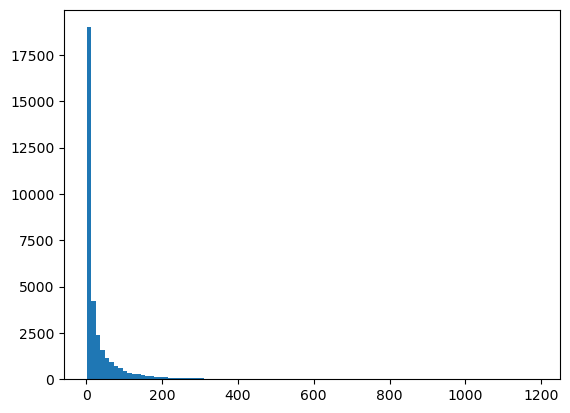

In [17]:
articles_per_user = user_article_interaction.groupby(by = ['ID_CommunityIdentity']).agg({"ID_Article": "count"}).reset_index()
# create histogram of articles per user
plt.hist(articles_per_user['ID_Article'], bins = 100)

In [18]:
print("Number of users: ", len(articles_per_user["ID_Article"]))
print("Total number of edges: ", np.sum(articles_per_user["ID_Article"]))

Number of users:  33703
Total number of edges:  1091932


(array([5584.,    0., 3441.,    0., 2029.,    0., 1562.,    0., 1156.,
           0., 1030.,    0.,  902.,    0.,  812.,    0.,  713.,    0.,
         648.,    0.,  571.,    0.,  540.,    0.,  483.,    0.,  431.,
           0.,  381.,    0.,  398.,    0.,  392.,    0.,  369.,    0.,
         340.,    0.,  344.,    0.,  278.,    0.,  280.,    0.,  279.,
           0.,  257.,    0.,  254.,    0.,    0.,  222.,    0.,  261.,
           0.,  207.,    0.,  222.,    0.,  203.,    0.,  188.,    0.,
         175.,    0.,  168.,    0.,  159.,    0.,  169.,    0.,  165.,
           0.,  159.,    0.,  155.,    0.,  145.,    0.,  137.,    0.,
         137.,    0.,  139.,    0.,  115.,    0.,  143.,    0.,  128.,
           0.,  107.,    0.,  122.,    0.,   95.,    0.,  113.,    0.,
         122.]),
 array([ 1.  ,  1.49,  1.98,  2.47,  2.96,  3.45,  3.94,  4.43,  4.92,
         5.41,  5.9 ,  6.39,  6.88,  7.37,  7.86,  8.35,  8.84,  9.33,
         9.82, 10.31, 10.8 , 11.29, 11.78, 12.27, 12.76, 13.

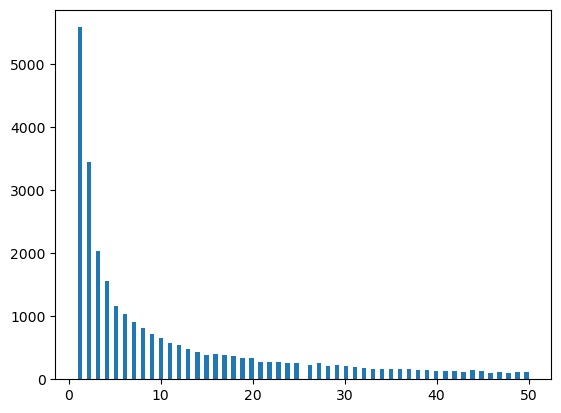

In [19]:
articles_per_user = user_article_interaction.groupby(by = ['ID_CommunityIdentity']).agg({"ID_Article": "count"}).reset_index()
# create histogram of articles per user
plt.hist(articles_per_user[articles_per_user['ID_Article'] <= 50]["ID_Article"], bins = 100)

In [20]:
print("Number of users with less than 50 articles: ", len(articles_per_user[articles_per_user['ID_Article'] <= 20]["ID_Article"]))
print("Total number of edges for users with less than 50 articles: ", np.sum(articles_per_user[articles_per_user['ID_Article'] <= 20]["ID_Article"]))

Number of users with less than 50 articles:  22126
Total number of edges for users with less than 50 articles:  126271


In [21]:
user_article_interaction["user_id"] = "u-" + user_article_interaction["ID_CommunityIdentity"].astype(str)
user_article_interaction["article_id"] = "a-" + user_article_interaction["ID_Article"].astype(str)

In [22]:
edge_list_user_article_interaction = []
for row in user_article_interaction.itertuples():
    edge_list_user_article_interaction.append((row.user_id, row.article_id))

users_init = np.unique(user_article_interaction['user_id']).tolist()
articles_init = np.unique(user_article_interaction['article_id']).tolist()

In [23]:
g_user_article_interaction = nx.Graph()
g_user_article_interaction.add_nodes_from(users_init, bipartite="users")
g_user_article_interaction.add_nodes_from(articles_init, bipartite="articles")
g_user_article_interaction.add_edges_from(edge_list_user_article_interaction)

In [24]:
users = [n for n in g_user_article_interaction.nodes() if g_user_article_interaction.nodes[n]['bipartite'] == 'users']
articles = [n for n in g_user_article_interaction.nodes() if g_user_article_interaction.nodes[n]['bipartite'] == 'articles']

In [95]:
print("Number of edges: ", g_user_article_interaction.number_of_edges())
print("Number of nodes: ", g_user_article_interaction.number_of_nodes())    
print("Number of users: ", len(users))
print("Number of articles: ", len(articles))
print("Number of connected components: ", nx.number_connected_components(g_user_article_interaction))
print("Average degree: ", np.mean([g_user_article_interaction.degree(n) for n in users]))

Number of edges:  895196
Number of nodes:  38054
Number of users:  33703
Number of articles:  4351
Number of connected components:  11
Average degree:  26.561315016467375


# Calculate biadjacency matrix for user-article post-or-vote graph

In [96]:
from networkx import bipartite
adjacency_matrix = bipartite.biadjacency_matrix(g_user_article_interaction, row_order=users, column_order=articles)
adjacency_matrix

<33703x4351 sparse array of type '<class 'numpy.int64'>'
	with 895196 stored elements in Compressed Sparse Row format>

# User-User one-mode projection from user-article post-or-vote to users
User is linked to user if they both posted or voted on the same article. Weight of the edge is the number of articles, which both users reacted to.

In [ ]:
user_user_projection_matmul = adjacency_matrix @ adjacency_matrix.T

A slower way to calculate the projection:

In [110]:
# from networkx.algorithms import bipartite
# user_user_projection = bipartite.weighted_projected_graph(g_user_article_interaction, users)

In [97]:
user_user_projection_matmul

<33703x33703 sparse array of type '<class 'numpy.int64'>'
	with 272508835 stored elements in Compressed Sparse Row format>

In [43]:
user_user_projection_matmul.shape

(33703, 33703)

In [104]:
user_user_projection_matmul[[0]].toarray()[0]

array([230,   1,   1, ...,   1,   8,   5])

# Article-article one-mode projection from user-article post-or-vote to articles
Article is linked to article if 2 articles were posted or voted by the same user. Weight of the edge is the number of users, who posted or voted for both articles.

In [98]:
article_article_projection_matmul = adjacency_matrix.T @ adjacency_matrix

In [99]:
article_article_projection_matmul

<4351x4351 sparse array of type '<class 'numpy.int64'>'
	with 9416325 stored elements in Compressed Sparse Column format>

In [100]:
article_article_projection_matmul

<4351x4351 sparse array of type '<class 'numpy.int64'>'
	with 9416325 stored elements in Compressed Sparse Column format>

In [109]:
article_article_projection_matmul[[0]].toarray()[0]

array([1, 0, 0, ..., 0, 0, 0])